# This notebook shows how to regenerate the results shown in the paper. 
### You can change the models and images in corresponding TestImage folders and the Test.py file

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, 'Code')
import Test

### Visualize:
Demonstrates the heatmaps, Localization boxes, and original test images

In [3]:
def visualize(ims,heatmaps,thrmaps):
    plt.figure(figsize=(24,6))
    n = len(heatmaps)
    for i in range(n):
        plt.subplot(3,n,i+1)
        plt.imshow(ims[i])
        plt.axis('off')

    for i in range(n):
        plt.subplot(3,n,n+i+1)
        plt.imshow(heatmaps[i],cmap='seismic')
        plt.axis('off')
    if len(thrmaps)>0:
        for i in range(n):
            plt.subplot(3,n,2*n+i+1)
            plt.imshow(thrmaps[i])
            plt.axis('off')
    plt.show()

## XCNN trained on CIFAR-10 

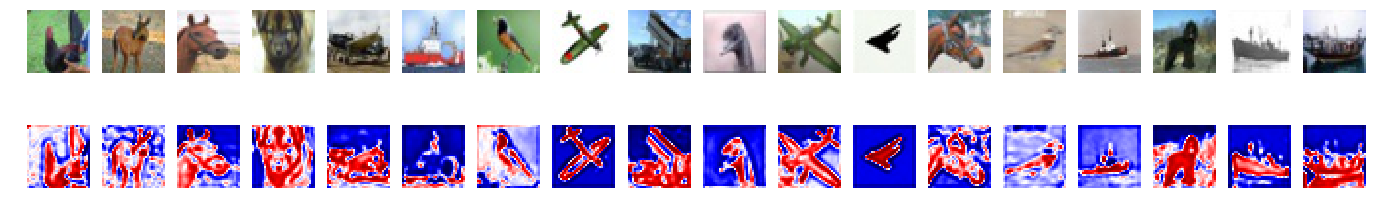

In [5]:
ims,heatmaps,thrmaps = Test.cifar()
visualize(ims,heatmaps,thrmaps)

## XCNN trained on TinyImageNet

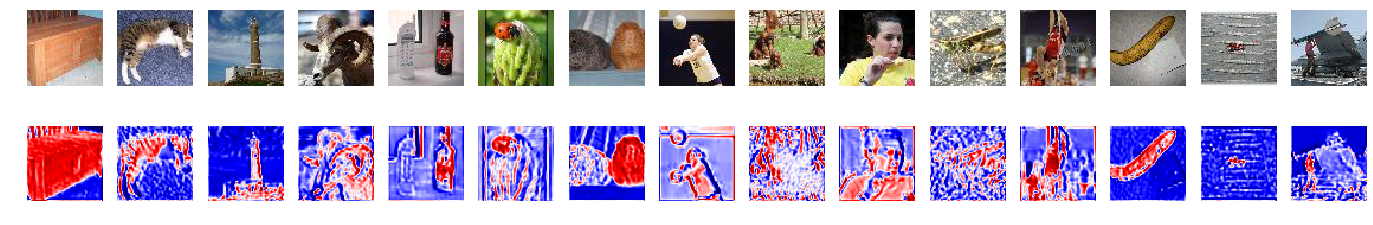

In [6]:
ims,heatmaps,thrmaps = Test.tinyimagenet()
visualize(ims,heatmaps,thrmaps)

## XCNN trained on MNIST

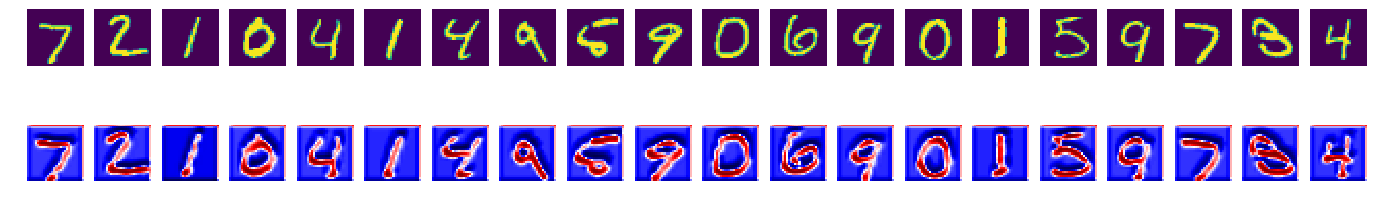

In [4]:
ims,heatmaps,thrmaps = Test.mnist()
visualize(ims,heatmaps,thrmaps)

**********

## Innvestigate tool 
### please see the reference 37 in the paper for more information about the innvestigate tool 

The 'run_innvestigate' arguments are:
- model_name: A trained Keras model address
- d: The test images in an array of size (n,h,w,3)
- mean: 120.707 for the Keras_Cifar.h5 model otherwise 0
- std: 64.15 for the Keras_Cifar.h5 model otherwise 255.0
- model_type: The XAI type used in innvestigation tool. Please see (https://github.com/albermax/innvestigate) for more details
- d0: If PatternNet or PatternAttribute (reference 17 in the paper) is used, d0 must be the training dataset and the 'analyzer.fit((d0-mean)/std)' line uncommented.

### Note: when using PatternNet or PatternAttribute, please use the trained models without batch-normalization layers. Keras models for this purpose are in the 'Models' folder with 'NoBN' signature.

In [25]:
import innvestigate
import innvestigate.utils
from keras.models import load_model
import os
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
def run_innvestigate(model_name,d,mean,std,model_type,d0=None):
    model = load_model(model_name)
    model = innvestigate.utils.model_wo_softmax(model)
    analyzer = innvestigate.create_analyzer(model_type, model)
    #for patternNet and patternattribute
    #d0 is training data
    #analyzer.fit((d0-mean)/std)
    
    plt.figure(figsize=(24,4))
    n = len(d)
    for i in range(n):
        plt.subplot(2,n,i+1)
        plt.imshow(d[i])
        plt.axis('off')
    for i in range(n):
        x = (d[i][None]-mean)/(std+1e-7)
        a = analyzer.analyze(x)
        a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
        a /= np.max(np.abs(a))
        plt.subplot(2,n,n+i+1)
        plt.imshow(0.5*a[0]+0.5,cmap="seismic")
        plt.axis('off')
        #plt.imshow(a[0], cmap="seismic", clim=(-1, 1))
    plt.show()

## Loading the Cifar-10 Test images

In [27]:
path = 'TestImages/cifar/'
mean = 120.707
std = 64.15
files = os.listdir(path)
d = []
for im_name in files:
    if im_name.endswith('.jpg'):
        d.append(img.imread(path+im_name))
d = np.stack(d)

## Gradient, Deep Taylor, Guided BP, and LRP results on Cifar-10

/home/dd7096/.local/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


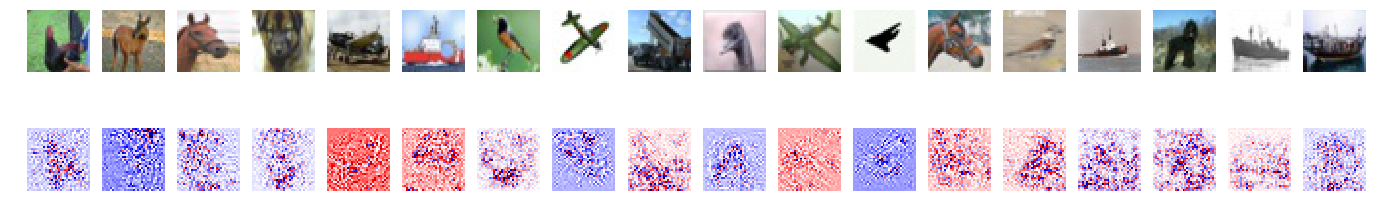

In [28]:
run_innvestigate('Models/Keras_Cifar.h5',d,mean,std,'gradient')

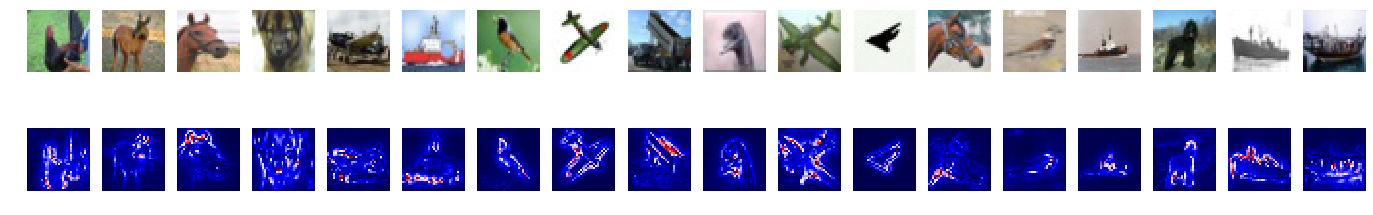

In [30]:
run_innvestigate('Models/Keras_Cifar.h5',d,mean,std,'deep_taylor')

/home/dd7096/.local/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


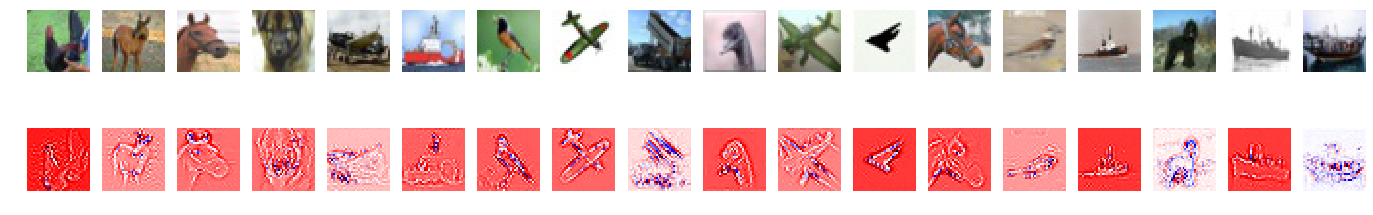

In [31]:
run_innvestigate('Models/Keras_Cifar.h5',d,mean,std,'guided_backprop')

/home/dd7096/.local/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


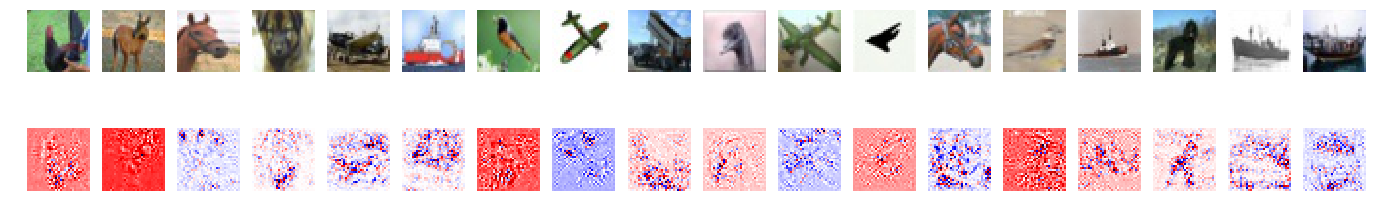

In [32]:
run_innvestigate('Models/Keras_Cifar.h5',d,mean,std,'lrp.epsilon')

## Load TinyImageNet Test images

In [36]:
path = 'TestImages/tinyimagenet/'
files = os.listdir(path)
d = []
for im_name in files:
    if im_name.endswith('.jpg'):
        d.append(img.imread(path+im_name))
d = np.stack(d)

## Gradient, Deep Taylor, Guided BP, and LRP results on TinyImageNet

/home/dd7096/.local/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


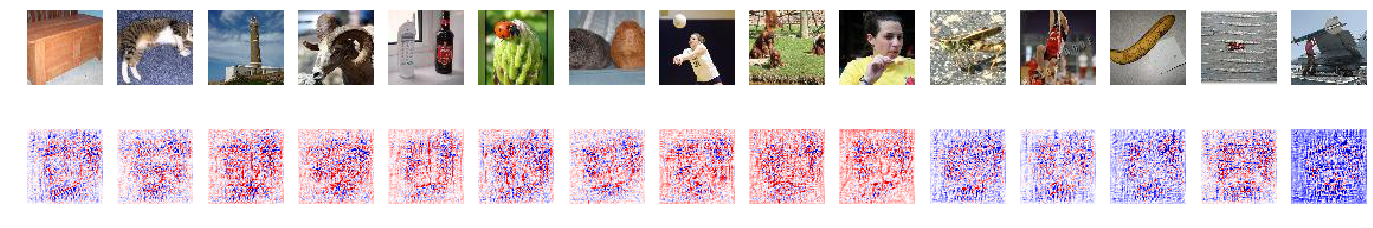

In [37]:
run_innvestigate('Models/Keras_ImageNet.h5',d,0.0,255.0,'gradient')

/home/dd7096/.local/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


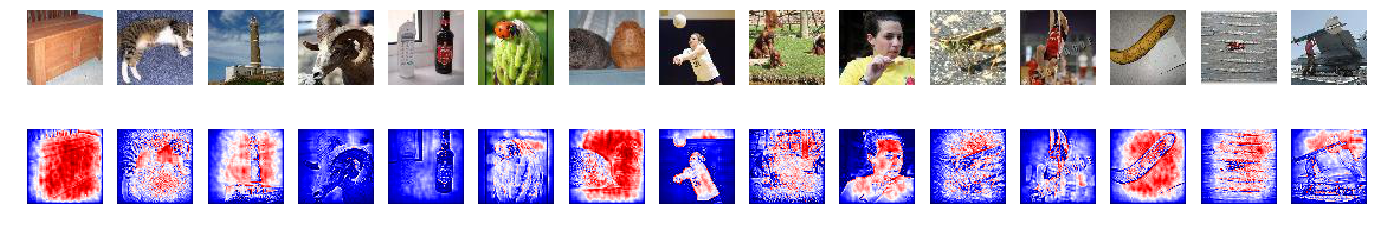

In [38]:
run_innvestigate('Models/Keras_ImageNet.h5',d,0.0,255.0,'deep_taylor')

/home/dd7096/.local/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


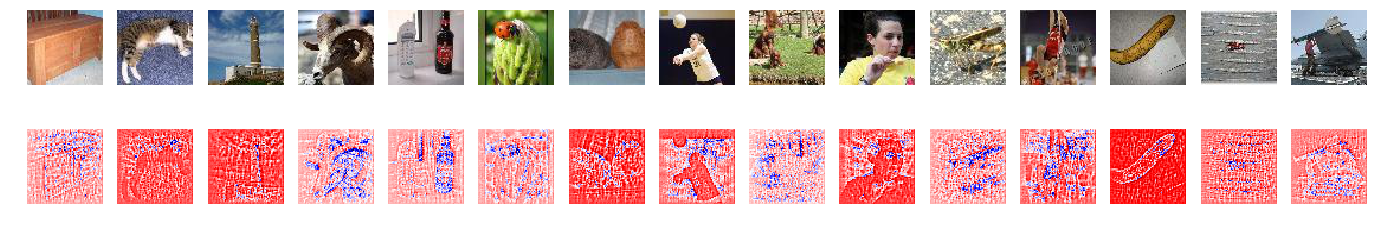

In [39]:
run_innvestigate('Models/Keras_ImageNet.h5',d,0.0,255.0,'guided_backprop')

/home/dd7096/.local/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


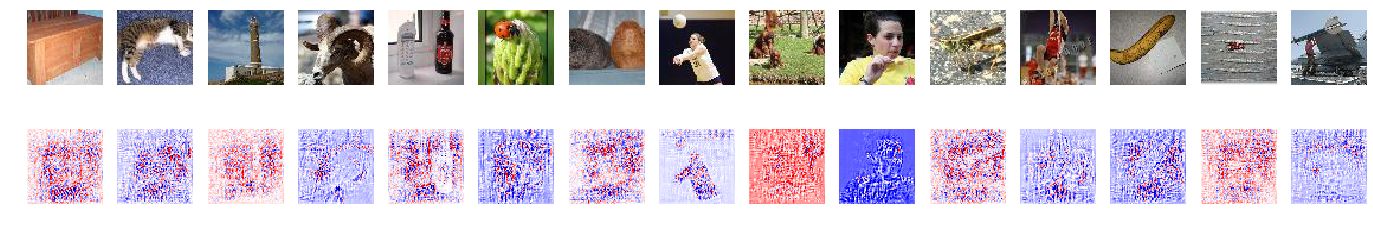

In [40]:
run_innvestigate('Models/Keras_ImageNet.h5',d,0.0,255.0,'lrp.epsilon')